In [1]:
import keras

from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

Using TensorFlow backend.


In [ ]:
# Code 1: Autoencoder, Dense Network, One Layer

In [27]:
encoding_dim = 32 

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoded = Dense(784, activation='sigmoid')(encoded_input)
decoder = Model(encoded_input,decoded)

autoencoder = Model(input_img,decoder(encoder(input_img)))

In [28]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [29]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [30]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [32]:
history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 112us/step - loss: 0.2212 - val_loss: 0.2120
Epoch 2/50
60000/60000 [==============================] - 6s 107us/step - loss: 0.2075 - val_loss: 0.2003
Epoch 3/50
60000/60000 [==============================] - 7s 114us/step - loss: 0.1969 - val_loss: 0.1904
Epoch 4/50
60000/60000 [==============================] - 6s 102us/step - loss: 0.1877 - val_loss: 0.1821
Epoch 5/50
60000/60000 [==============================] - 6s 104us/step - loss: 0.1800 - val_loss: 0.1753
Epoch 6/50
60000/60000 [==============================] - 7s 113us/step - loss: 0.1739 - val_loss: 0.1697
Epoch 7/50
60000/60000 [==============================] - 6s 104us/step - loss: 0.1688 - val_loss: 0.1650
Epoch 8/50
60000/60000 [==============================] - 6s 104us/step - loss: 0.1644 - val_loss: 0.1610
Epoch 9/50
60000/60000 [==============================] - 6s 92us/step - loss: 0.1604 - val_loss: 0.15

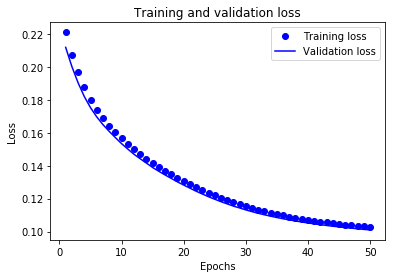

In [34]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 51)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

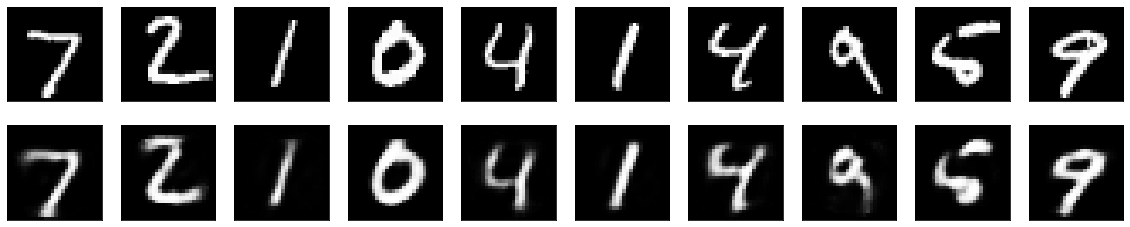

In [37]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))

for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()